In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
insurance_data = pd.read_csv("insurance.csv")

In [ ]:
#frist 5 rows from the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#find the datatypes of all columns
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#finding the no of rows and columns
insurance_data.shape

(1338, 7)

In [ ]:
#Check the null values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Statistical measure of the data set
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-12-098067c0de0c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


Text(0.5, 1.0, 'Age Distribution')

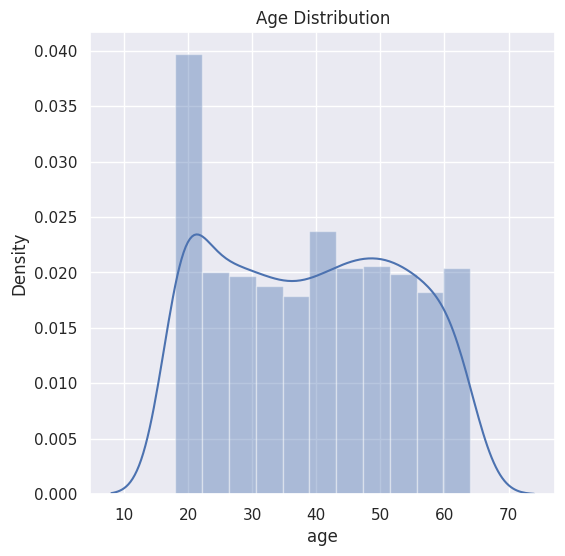

In [ ]:
#Distribution of age value using seabron library
sns.set()
plt.figure(figsize =(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")


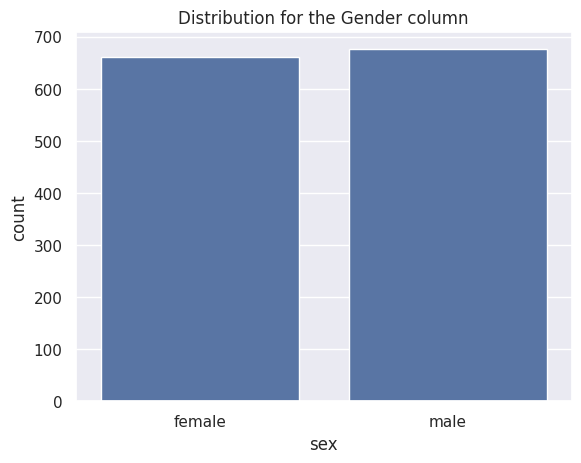

<Figure size 600x600 with 0 Axes>

In [ ]:
#Gender column
sns.set()
sns.countplot(x ='sex', data = insurance_data)
plt.title("Distribution for the Gender column")
plt.figure(figsize= (6,6))
plt.show()


<ipython-input-14-c8cbe9d0f5e9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


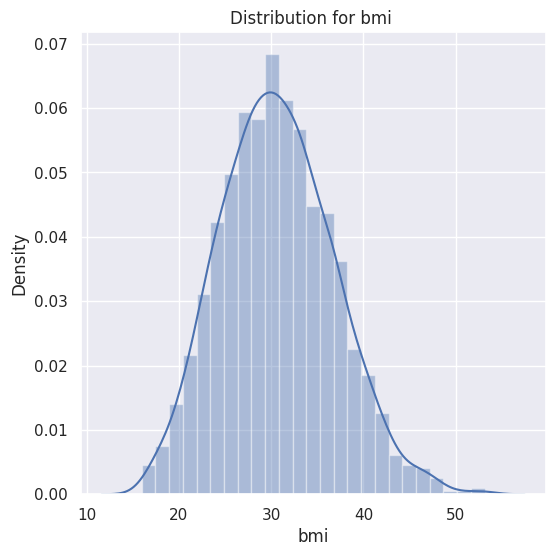

In [ ]:
#BMI distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("Distribution for bmi ")
plt.show()

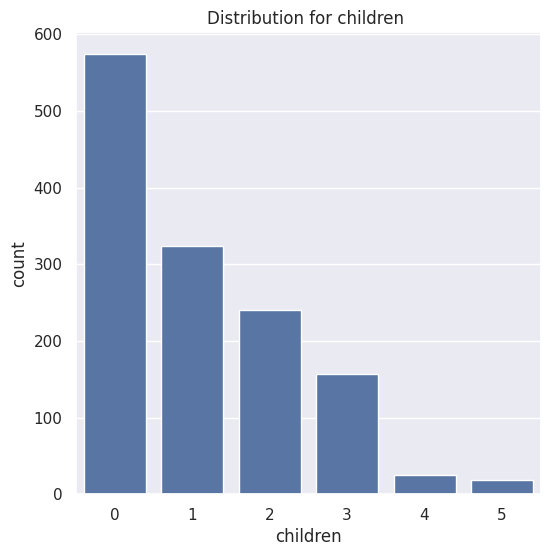

In [ ]:
#children distribution
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'children',data = insurance_data)
plt.title("Distribution for children ")
plt.show()

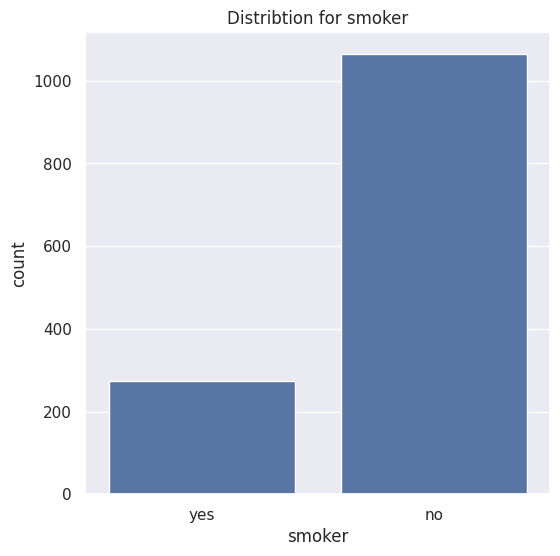

In [ ]:
#Distribution for smoker column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker',data = insurance_data)
plt.title("Distribtion for smoker")
plt.show()

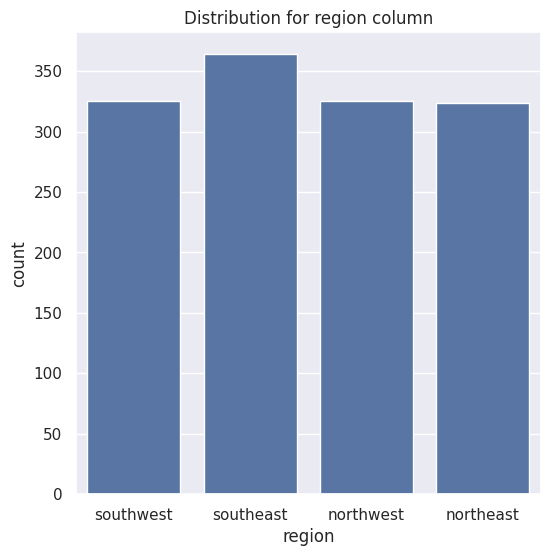

In [ ]:
#Distribution for the region column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = insurance_data)
plt.title("Distribution for region column")
plt.show()

<ipython-input-18-425c9aec9535>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


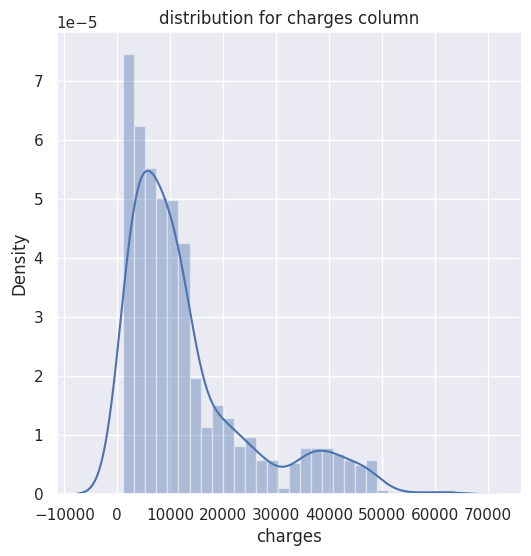

In [ ]:
#Distribution for the charges column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title("distribution for charges column")
plt.show()

In [ ]:
#data processing
# encoding for smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
#encoding for region column
insurance_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)
#encoding for  sex column
insurance_data.replace({'sex':{'male':0,'female':0}},inplace=True)

In [ ]:
#spliting input features and the label(target)
X = insurance_data.drop(columns= 'charges',axis = 1)
Y = insurance_data['charges']


In [ ]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    0  31.920         0       1       3
1335   18    0  36.850         0       1       1
1336   21    0  25.800         0       1       0
1337   61    0  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [ ]:
#spliting the dataset into training and testing data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
#model building
model = LinearRegression()


In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Model evaluation
training_data_prediction = model.predict(X_train)


In [ ]:
#Accuracy score
traning_data_accuracy = metrics.r2_score(Y_train,training_data_prediction)
print("Accuracy score of training data is",traning_data_accuracy)

Accuracy score of training data is 0.751990236156533


In [ ]:
#Model evaluation
testing_data_prediction = model.predict(X_test)
testing_data_accuracy = metrics.r2_score(Y_test,testing_data_prediction)
print("Accuracy score of testing data is",testing_data_accuracy)


Accuracy score of testing data is 0.7444797316621943


In [ ]:
input_data = (28,1,34.77,0,1,2)
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)


In [ ]:
prediction  =model.predict(input_data_reshape)
print("the cost of insurance",prediction)

the cost of insurance [6448.97450253]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500
